## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.float_format', "{:,.2f}".format)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the csv into a dataframe
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

In [4]:
# display percentage of missing values in columns
100*df.isnull().sum()/len(df.index)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In the data_dictionary file, we see that certain categorical varibles have NA as a category (value) indicating not present.
So technically, they are not missing values.

We will replace NA in those variables with another string (Not_present)

In [5]:
columns_with_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                   'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df[columns_with_na] = df[columns_with_na].fillna('Not_present')
# display percentage of missing values in columns
100*df.isnull().sum()/len(df.index)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFin

In some features, we have high percent of NA values which means that is there is not enough information content.

So it is best to drop those columns with high missing values.

In [6]:
# dropping columns having more than 45% missing values
drop_s = df.isnull().sum()/len(df.index)
df.drop(drop_s.where(drop_s > 0.45).dropna().index, axis=1, inplace=True)
df.shape

(1460, 76)

In [7]:
# Number of rows having 5 or more missing values
len(df[df.isnull().sum(axis=1) > 4])

0

Some colums have very few missing values. Let us drop those records as well

In [8]:
df = df[~(df['MasVnrType'].isnull() | df['MasVnrArea'].isnull() | df['GarageYrBlt'].isnull() | df['Electrical'].isnull())]
df.shape

(1370, 76)

### Creating Derived columns

In [9]:
# calculate the Age of the house
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [10]:
# Check the correlation of LotFrontage column with the predictor variable
df[['LotFrontage','SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.00,0.34
SalePrice,0.34,1.00


Not a good correlation number, we can drop the LotFrontage column
We will also drop some of the year variables and the Id column

In [11]:
# Dropping LotFrontage and Id column
df.drop(['LotFrontage', 'Id', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'YearBuilt', 'MoSold'], axis=1, inplace=True)

df.shape

(1370, 70)

In [12]:
# Percentage of records retained after cleaning
100*len(df.index)/1460

93.83561643835617

We have retained a good amount of data.

Let us understand the variables and prepare the data for modelling

## Data Preparation

In [13]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge
count,"1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00","1,370.00"
mean,56.05,"10,687.44",6.18,5.58,109.08,454.21,48.42,570.74,"1,073.37","1,176.09",353.20,4.16,"1,533.45",0.43,0.06,1.58,0.39,2.87,1.04,6.55,0.64,1.87,500.46,97.66,47.03,21.03,3.63,16.05,2.94,43.17,"185,194.80",35.03
std,41.07,"10,228.51",1.34,1.08,184.59,458.99,164.82,444.05,435.56,385.38,439.50,40.26,519.49,0.51,0.24,0.55,0.50,0.78,0.19,1.59,0.64,0.63,185.99,126.81,65.00,60.52,30.25,57.42,41.47,503.25,"78,899.71",29.41
min,20.00,"1,300.00",2.00,2.00,0.00,0.00,0.00,0.00,0.00,438.00,0.00,0.00,438.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,0.00,1.00,160.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"35,311.00",0.00
25%,20.00,"7,731.00",5.00,5.00,0.00,0.00,0.00,225.50,808.50,894.00,0.00,0.00,"1,152.00",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1.00,377.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"133,925.00",7.00
50%,50.00,"9,591.00",6.00,5.00,0.00,399.50,0.00,477.50,"1,008.00","1,098.00",0.00,0.00,"1,479.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,2.00,484.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,"167,000.00",33.00
75%,70.00,"11,712.75",7.00,6.00,171.75,728.00,0.00,811.00,"1,314.00","1,414.00",737.00,0.00,"1,788.00",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2.00,582.75,171.00,69.00,0.00,0.00,0.00,0.00,0.00,"217,875.00",53.00
max,190.00,"215,245.00",10.00,9.00,"1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",2.00,2.00,3.00,2.00,6.00,3.00,12.00,3.00,4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00","755,000.00",129.00


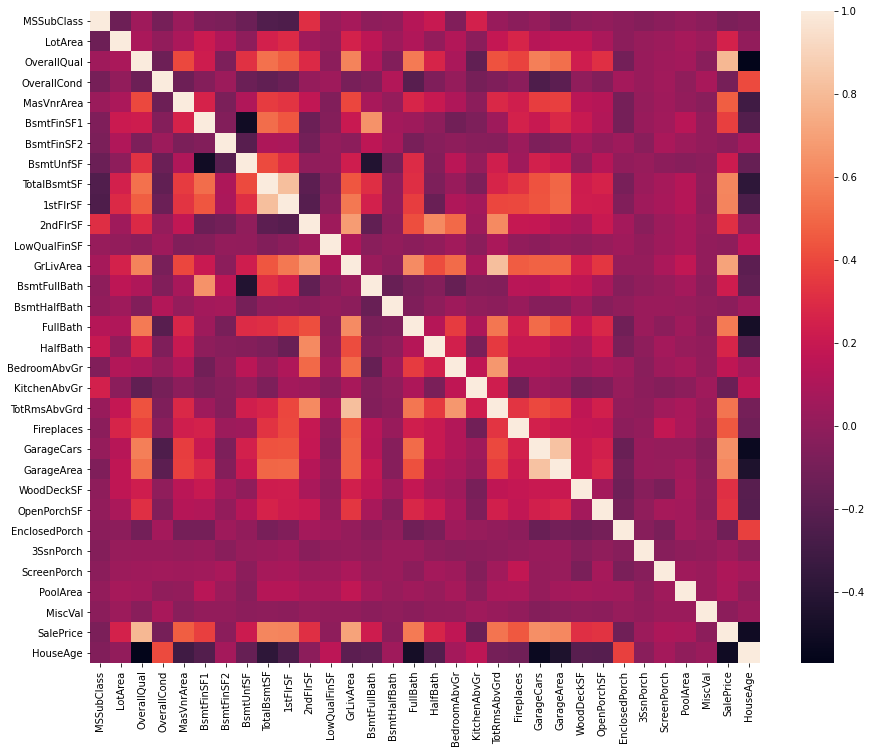

In [14]:
plt.figure(figsize=[15,12])
sns.heatmap(df.corr())
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1370 non-null   int64  
 1   MSZoning       1370 non-null   object 
 2   LotArea        1370 non-null   int64  
 3   Street         1370 non-null   object 
 4   LotShape       1370 non-null   object 
 5   LandContour    1370 non-null   object 
 6   Utilities      1370 non-null   object 
 7   LotConfig      1370 non-null   object 
 8   LandSlope      1370 non-null   object 
 9   Neighborhood   1370 non-null   object 
 10  Condition1     1370 non-null   object 
 11  Condition2     1370 non-null   object 
 12  BldgType       1370 non-null   object 
 13  HouseStyle     1370 non-null   object 
 14  OverallQual    1370 non-null   int64  
 15  OverallCond    1370 non-null   int64  
 16  RoofStyle      1370 non-null   object 
 17  RoofMatl       1370 non-null   object 
 18  Exterior

### Convert categorical to numerical

Upon Manual observation of columns, we see that there are 3 types of variables:
1. Numerical (ordered)
2. Ordered categorical
2. Unordered categorical

Let us identity them first.


In [16]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
                       'GarageType', 'SaleType', 'SaleCondition']

ordinal_columns = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 
                   'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

num_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
          '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
          'MiscVal','HouseAge','SalePrice']

In [17]:
# converting MSSubClass to type object
df['MSSubClass'] = df['MSSubClass'].astype('object')

### Custom Ordinal Encoding

In [18]:
ordinal_values = {
    "LotShape": {'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},
    "Utilities": {'AllPub':1, 'NoSewr':2 ,'NoSeWa':3, 'ELO': 4},
    "LandSlope": {'Gtl':1, 'Mod':2, 'Sev':3},
    "ExterQual": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
    "ExterCond": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
    "BsmtQual": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'Not_present': 6},
    "BsmtCond": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'Not_present': 6},
    "BsmtExposure": {'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'Not_present':5},
    "BsmtFinType1": {'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'Not_present':7},
    "BsmtFinType2": {'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'Not_present':7},
    "HeatingQC": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
    "KitchenQual": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
    "Functional": {'Typ':1, 'Min1':2 ,'Min2':3 ,'Mod':4 ,'Maj1':5 ,'Maj2':6 ,'Sev':7 ,'Sal':8},
    "GarageFinish": {'Fin':1, 'RFn':2, 'Unf':3, 'Not_present': 4},
    "GarageQual": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'Not_present': 6},
    "GarageCond": {'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'Not_present': 6},
    "PavedDrive": {'Y':1, 'P':2, 'N':3}
}

df = df.replace(ordinal_values)
df.shape

(1370, 70)

### Coverting the unordered categorical variables to numerical values

In [19]:
# df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype='int')
dummies_df = pd.get_dummies(df[categorical_columns], drop_first=True)
df = pd.concat([df, dummies_df], axis=1)
df = df.drop(categorical_columns, axis=1)

df.shape

(1370, 200)

We now have 200 total features

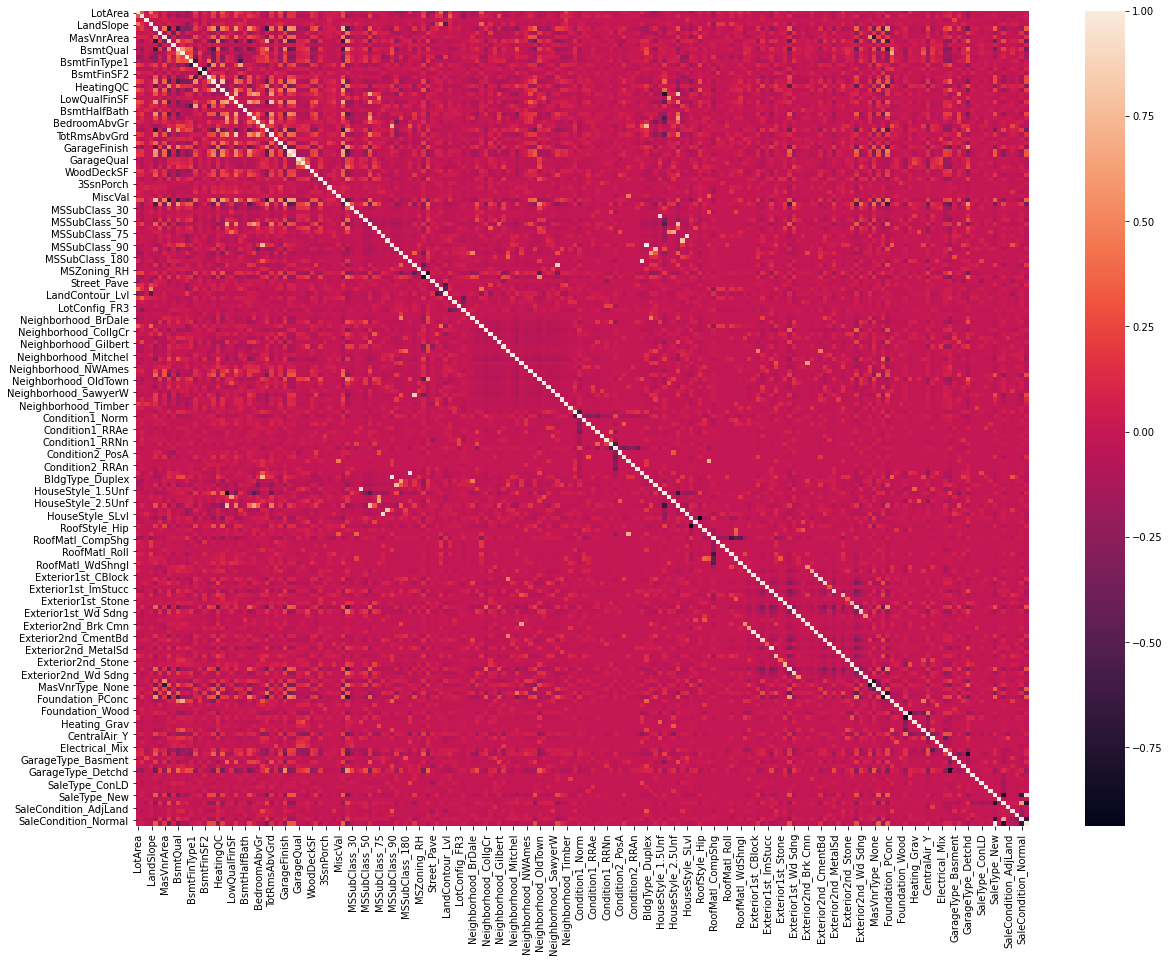

In [20]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr())
plt.show()

In [21]:
# Get features with high correlation (both positive and negative) with the target variable

tc_corr = df.drop("SalePrice", axis=1).apply(lambda x: x.corr(df.SalePrice))
tc_corr.where(abs(tc_corr) > 0.5).dropna()

OverallQual     0.79
ExterQual      -0.67
BsmtQual       -0.59
TotalBsmtSF     0.60
1stFlrSF        0.60
GrLivArea       0.71
FullBath        0.56
KitchenQual    -0.65
TotRmsAbvGrd    0.54
GarageFinish   -0.51
GarageCars      0.64
GarageArea      0.61
HouseAge       -0.51
dtype: float64

In [22]:
top_corr_features = tc_corr.where(abs(tc_corr) > 0.5).dropna().index
top_corr_features

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish',
       'GarageCars', 'GarageArea', 'HouseAge'],
      dtype='object')

We see the top features having a strong relationship with the target variable
Now that we have these top features with high correlation, let us understand their distribution

## Exploratory Data Analysis (EDA)

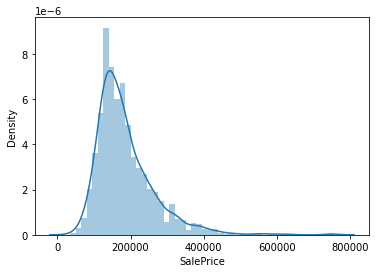

In [23]:
sns.distplot(df['SalePrice'])
plt.show()

The taget variable has a normal distribution

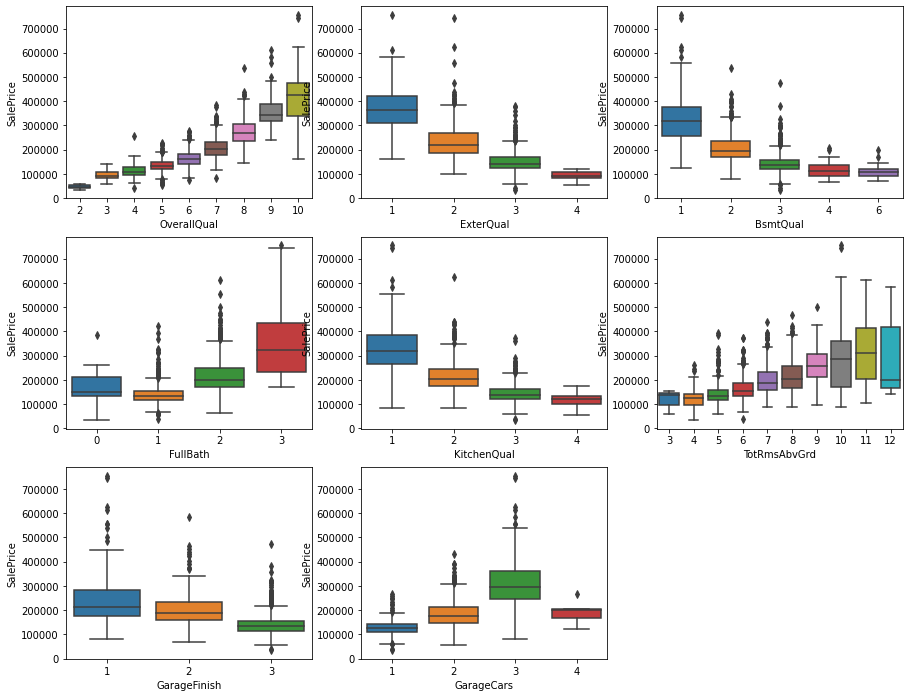

In [24]:
plt.figure(figsize=[15,12])

plt.subplot(3,3,1)
sns.boxplot(df['OverallQual'], df['SalePrice'])

plt.subplot(3,3,2)
sns.boxplot(df['ExterQual'], df['SalePrice'])

plt.subplot(3,3,3)
sns.boxplot(df['BsmtQual'], df['SalePrice'])

plt.subplot(3,3,4)
sns.boxplot(df['FullBath'], df['SalePrice'])

plt.subplot(3,3,5)
sns.boxplot(df['KitchenQual'], df['SalePrice'])

plt.subplot(3,3,6)
sns.boxplot(df['TotRmsAbvGrd'], df['SalePrice'])

plt.subplot(3,3,7)
sns.boxplot(df['GarageFinish'], df['SalePrice'])

plt.subplot(3,3,8)
sns.boxplot(df['GarageCars'], df['SalePrice'])


plt.show()

We see that SalePrice has a strong pattern with all these features

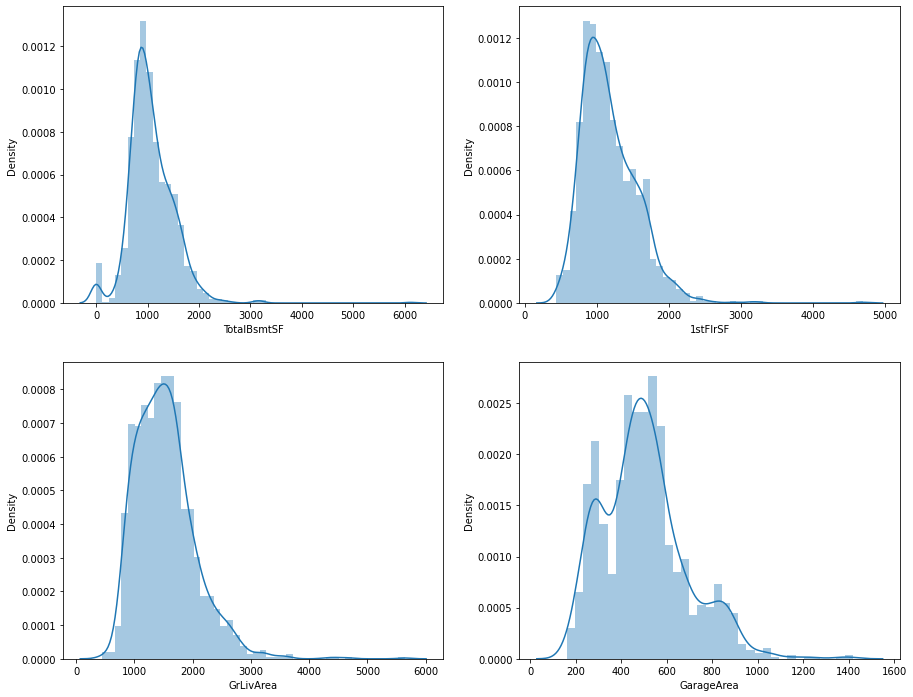

In [25]:
# check distribution for some features
plt.figure(figsize=[15,12])

plt.subplot(2,2,1)
sns.distplot(df['TotalBsmtSF'])

plt.subplot(2,2,2)
sns.distplot(df['1stFlrSF'])

plt.subplot(2,2,3)
sns.distplot(df['GrLivArea'])

plt.subplot(2,2,4)
sns.distplot(df['GarageArea'])

plt.show()

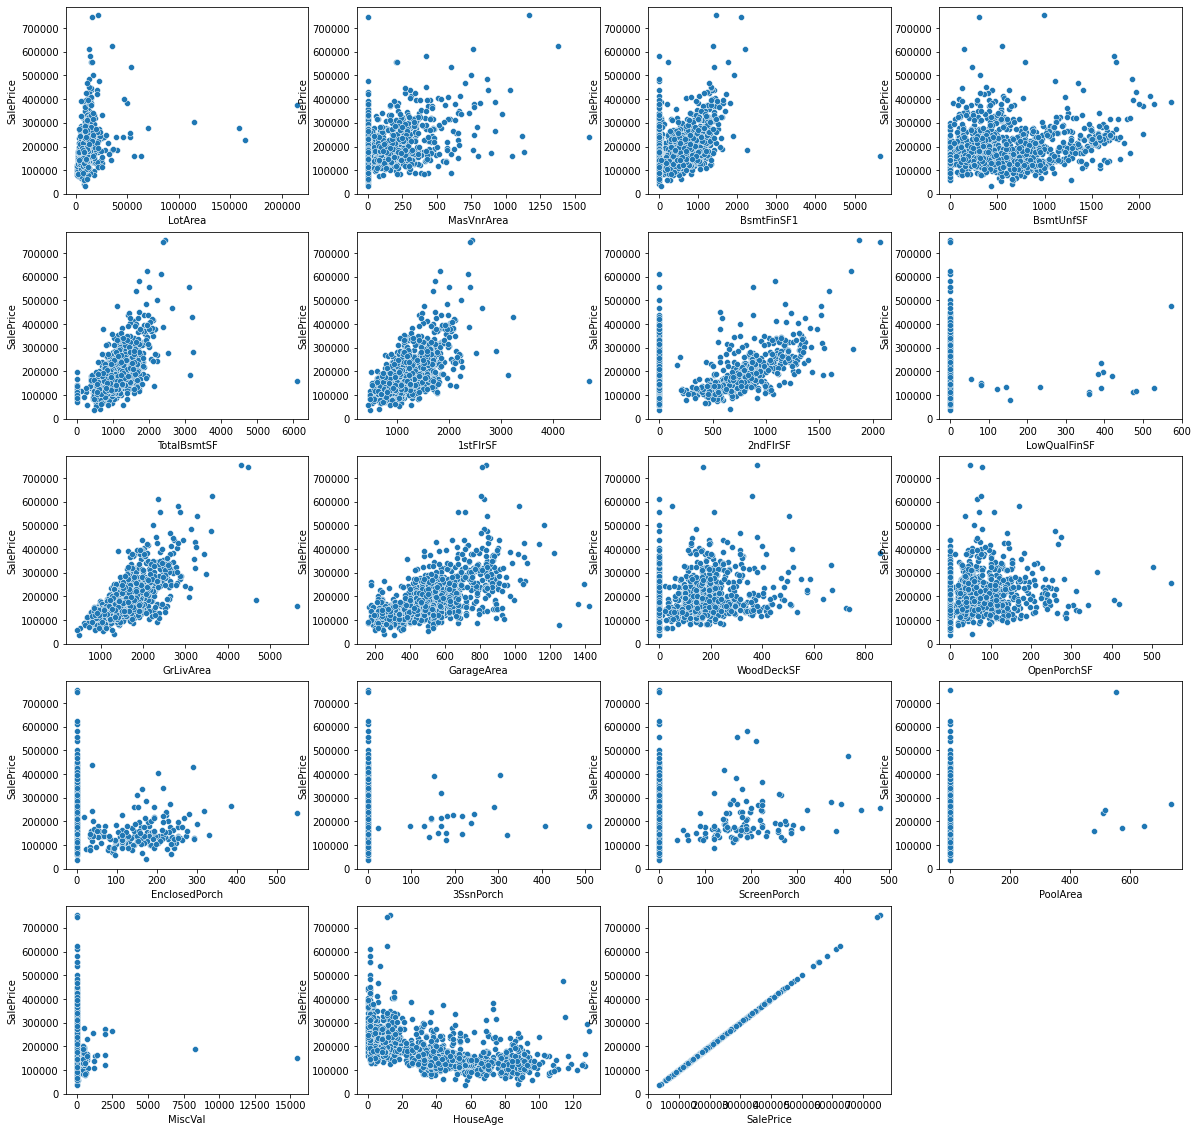

In [26]:
# check relationship of SalePrice with all numerical columns

plt.figure(figsize=[20,20])

for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(df[num_cols[i]],df['SalePrice'])


plt.show()

We can see a linear relationship of Price with most of the selected features.

Let us create a Linear Regression model and see its results

## Modelling

In [27]:
# Splitting into train-test

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
# Scaling the numerical values

sc = StandardScaler()
df_train[num_cols] = sc.fit_transform(df_train[num_cols])
df_test[num_cols] = sc.transform(df_test[num_cols])

df_train.head()

,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
178,0.55,2,1,1,9,5,3.53,1,3,1,3,4,1,3.16,6,0,-0.58,2.53,1,2.70,-0.79,-0.09,1.43,1,0,2,0,1,1,1,9,1,1,1,3,3.61,3,3,1,-0.75,0.22,-0.36,-0.11,-0.28,-0.06,-0.09,4.17,-1.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1276,0.17,2,1,1,6,6,-0.59,3,3,3,2,4,3,0.31,6,0,-0.99,-0.78,3,-1.15,0.76,-0.09,-0.25,0,1,1,1,3,1,3,6,1,1,3,2,-0.01,3,3,1,1.61,1.10,-0.36,-0.11,-0.28,-0.06,-0.09,-0.29,0.05,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [29]:
# seperate features from target variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

There are a lot of features. Let us do RFE to get top 45 features

### RFE

In [30]:
# RFE with 45 features
lm = LinearRegression()
rfe = RFE(lm, 45)

# Fit with 15 features
rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
X_train = X_train[col]
X_test = X_test[col]
col

Index(['OverallQual', 'ExterQual', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF',
       'KitchenAbvGr', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190',
       'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition2_PosN',
       'BldgType_2fmCon', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Foundation_Wood',
       'Heating_OthW', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [31]:
# fit the model
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [32]:
# predict and calcuate the train r2_score
y_train_pred = lm.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))
mse = mean_squared_error(y_train, y_train_pred)
print("Train mean square error", mse)
rmse = mse**0.5
print("Train Root Mean Squared Error", rmse)

Train r2:  0.8791343887359154
Train mean square error 0.12086561126408459
Train Root Mean Squared Error 0.347657318726479


In [33]:
# predict and calcuate the test r2_score
y_test_pred = lm.predict(X_test[col])

print("Test r2: ", r2_score(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
print("Test mean square error", mse)
rmse = mse**0.5
print("Test Root Mean Squared Error", rmse)

Test r2:  0.7898568615352035
Test mean square error 0.2598245018753985
Test Root Mean Squared Error 0.5097298322399804


In [34]:
# calcuate the residuals
res = y_train - y_train_pred

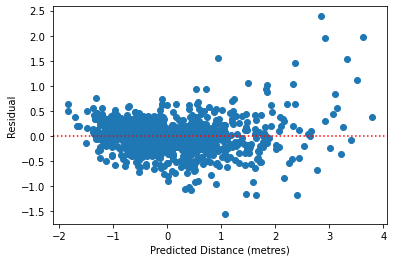

In [35]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(y_train_pred , res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

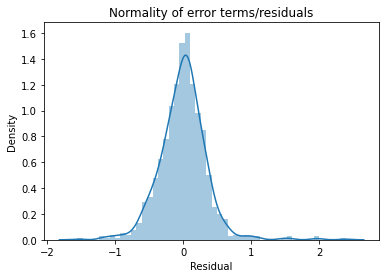

In [36]:
# Distribution of errors
p = sns.distplot(res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

## Observations:
There is no pattern in the error terms..
Also they are normally distributed with mean 0.

Hence we can say that Linear Model is a fair choice for this problem.

But, we see a huge difference in the train and test r2_score. Which means that the model is complex and there is overfitting.
We will now try regularization techniques like Ridge and Lasso

In [37]:
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [38]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,{'alpha': 0.0001},0.71,0.88
1,{'alpha': 0.001},0.71,0.88
2,{'alpha': 0.01},0.72,0.88
3,{'alpha': 0.05},0.75,0.88
4,{'alpha': 0.1},0.77,0.87
5,{'alpha': 0.2},0.78,0.86
6,{'alpha': 0.3},0.78,0.86
7,{'alpha': 0.4},0.78,0.85
8,{'alpha': 0.5},0.79,0.85
9,{'alpha': 0.6},0.79,0.85


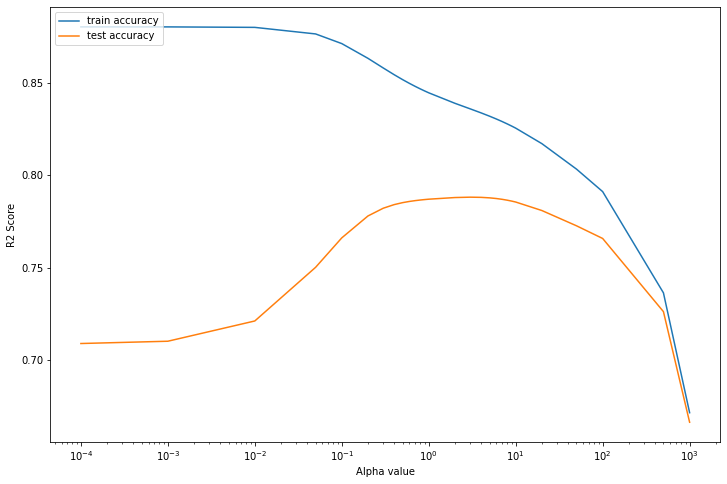

In [39]:
# plot alpha vs R2 score
plt.figure(figsize=(12,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.show()

In [40]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [41]:
#Fitting Ridge model for best alpha value and printing coefficients which have been penalised

ridge = Ridge(alpha=3)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.25286119 -0.31893992  0.10793436  0.28364451  0.21535134 -0.29201247
 -0.32324094 -0.34529362 -0.05914405  0.26148778  0.39247562  0.21008279
  0.14478547  0.41000271  0.60958209  0.69694969  0.19856596 -0.12205213
  0.0420379  -0.21577056 -0.06718611 -0.12726415 -0.02169386  0.0670958
  0.54884311  0.13297076  0.02096642  0.16152561  0.21088171  0.12787975
  0.66224114 -0.13096862  0.04597176 -0.08450102  0.01899238  0.04597176
 -0.07262799  0.1815994  -0.11238553 -0.17118267  0.16032525  0.09290381
 -0.14753652  0.23411941  0.04028929]


In [42]:
# predict and calcuate the train r2_score
y_train_pred = ridge.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))
mse = mean_squared_error(y_train, y_train_pred)
print("Train mean square error", mse)
rmse = mse**0.5
print("Train Root Mean Squared Error", rmse)


# predict and calcuate the test r2_score
y_test_pred = ridge.predict(X_test)

print("Test r2: ", r2_score(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
print("Test mean square error", mse)
rmse = mse**0.5
print("Test Root Mean Squared Error", rmse)

Train r2:  0.8328577080635317
Train mean square error 0.16714229193646832
Train Root Mean Squared Error 0.4088303950741289
Test r2:  0.7960727475572644
Test mean square error 0.25213907611658043
Test Root Mean Squared Error 0.5021345199412011


In [43]:
# sort the ridge coefficients by magnitude
ridge_coef = pd.DataFrame(zip(X_train.columns,ridge.coef_), columns=['Feature','coefficient'])
ridge_coef['magnitude'] = abs(ridge_coef['coefficient'])
ridge_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(20)

,Feature,coefficient
15,Neighborhood_StoneBr,0.70
30,RoofMatl_WdShngl,0.66
14,Neighborhood_NridgHt,0.61
24,RoofMatl_CompShg,0.55
13,Neighborhood_NoRidge,0.41
10,Neighborhood_ClearCr,0.39
7,MSSubClass_160,-0.35
6,MSSubClass_120,-0.32
1,ExterQual,-0.32
5,KitchenAbvGr,-0.29


### Assignment part 2 subjective question:

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer is in pdf file

In [44]:
ridge_d = Ridge(alpha=6)
        
ridge_d.fit(X_train, y_train) 

# predict and calcuate the train r2_score
y_train_pred = ridge_d.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))

# predict and calcuate the test r2_score
y_test_pred = ridge_d.predict(X_test)

print("Test r2: ", r2_score(y_test, y_test_pred))

# sort the lasso coefficients by magnitude.
ridge_d_coef = pd.DataFrame(zip(X_train.columns,ridge_d.coef_), columns=['Feature','coefficient'])
ridge_d_coef['magnitude'] = abs(ridge_d_coef['coefficient'])
ridge_d_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(5)

Train r2:  0.82793151147944
Test r2:  0.7939243788958301


,Feature,coefficient
15,Neighborhood_StoneBr,0.58
14,Neighborhood_NridgHt,0.55
30,RoofMatl_WdShngl,0.38
13,Neighborhood_NoRidge,0.36
24,RoofMatl_CompShg,0.35


### Let us now try Lasso for feature selection, as we have a lot of features

In [45]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [46]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params','mean_test_score','mean_train_score']]

,params,mean_test_score,mean_train_score
0,{'alpha': 0.0001},0.70,0.88
1,{'alpha': 0.001},0.78,0.84
2,{'alpha': 0.01},0.76,0.80
3,{'alpha': 0.05},0.73,0.75
4,{'alpha': 0.1},0.70,0.71
5,{'alpha': 0.2},0.64,0.65
6,{'alpha': 0.3},0.59,0.59
7,{'alpha': 0.4},0.53,0.53
8,{'alpha': 0.5},0.48,0.48
9,{'alpha': 0.6},0.42,0.42


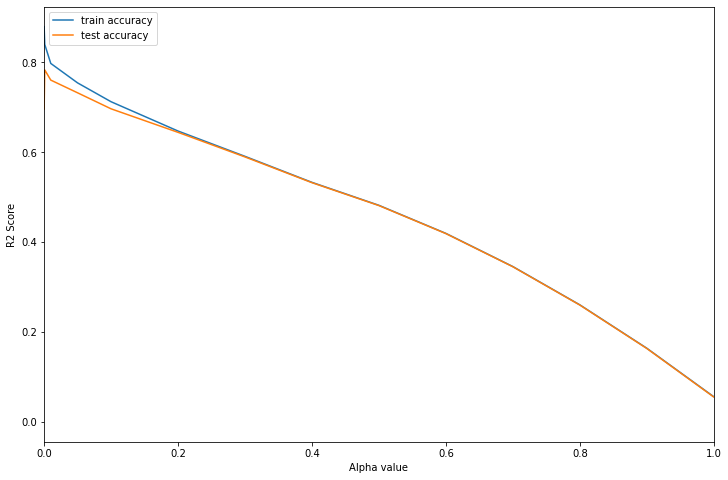

In [47]:
# plot alpha vs R2 score
plt.figure(figsize=(12,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.xlim(0,1)
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.show()

In [48]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [49]:
#Fitting Ridge model for best alpha value and printing coefficients which have been penalised

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.24979596, -0.31817652,  0.10649182,  0.2830893 ,  0.21399922,
       -0.27622001, -0.32734899, -0.34077979, -0.        ,  0.26846168,
        0.43849053,  0.20608629,  0.04221431,  0.42890524,  0.63966284,
        0.7732433 ,  0.17868291, -0.        , -0.        , -0.18959552,
       -0.        , -0.09954569,  0.        ,  0.        ,  0.67746003,
        0.        ,  0.        ,  0.        ,  0.29562081,  0.165332  ,
        1.04641166, -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.03703249, -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.26484311,  0.        ])

In [50]:
# predict and calcuate the train r2_score
y_train_pred = lasso.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))
mse = mean_squared_error(y_train, y_train_pred)
print("Train mean square error", mse)
rmse = mse**0.5
print("Train Root Mean Squared Error", rmse)

# predict and calcuate the test r2_score
y_test_pred = lasso.predict(X_test)

print("Test r2: ", r2_score(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
print("Test mean square error", mse)
rmse = mse**0.5
print("Test Root Mean Squared Error", rmse)

Train r2:  0.8329103141855847
Train mean square error 0.16708968581441527
Train Root Mean Squared Error 0.4087660526687793
Test r2:  0.7954911521371489
Test mean square error 0.2528581704511777
Test Root Mean Squared Error 0.5028500476794028


In [51]:
# sort the lasso coefficients by magnitude
lasso_coef = pd.DataFrame(zip(X_train.columns,lasso.coef_), columns=['Feature','coefficient'])
lasso_coef['magnitude'] = abs(lasso_coef['coefficient'])
lasso_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(20)

,Feature,coefficient
30,RoofMatl_WdShngl,1.05
15,Neighborhood_StoneBr,0.77
24,RoofMatl_CompShg,0.68
14,Neighborhood_NridgHt,0.64
10,Neighborhood_ClearCr,0.44
13,Neighborhood_NoRidge,0.43
7,MSSubClass_160,-0.34
6,MSSubClass_120,-0.33
1,ExterQual,-0.32
28,RoofMatl_Tar&Grv,0.30


### Assignment part 2 subjective question:

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer is in pdf file

In [52]:
lasso_d = Lasso(alpha=0.002)
        
lasso_d.fit(X_train, y_train) 

# predict and calcuate the train r2_score
y_train_pred = lasso_d.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))

# predict and calcuate the test r2_score
y_test_pred = lasso_d.predict(X_test)

print("Test r2: ", r2_score(y_test, y_test_pred))

# sort the lasso coefficients by magnitude.
lasso_d_coef = pd.DataFrame(zip(X_train.columns,lasso_d.coef_), columns=['Feature','coefficient'])
lasso_d_coef['magnitude'] = abs(lasso_d_coef['coefficient'])
lasso_d_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(5)

Train r2:  0.8267695522151461
Test r2:  0.790667633334217


,Feature,coefficient
15,Neighborhood_StoneBr,0.70
14,Neighborhood_NridgHt,0.61
30,RoofMatl_WdShngl,0.41
13,Neighborhood_NoRidge,0.38
10,Neighborhood_ClearCr,0.36


### Assignment par 2 subjective question:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Check the next top 5 features. 
Answer is in pdf file

In [53]:
# remvoing the top5 features
top_5_list = ['RoofMatl_WdShngl', 'Neighborhood_StoneBr',
              'RoofMatl_CompShg', 'Neighborhood_NridgHt', 'Neighborhood_ClearCr']

X_train_rm = X_train.drop(top_5_list, axis=1)
X_test_rm = X_test.drop(top_5_list, axis=1)
lasso_rm = Lasso(alpha=0.001)
        
lasso_rm.fit(X_train_rm, y_train) 

# predict and calcuate the train r2_score
y_train_pred = lasso_rm.predict(X_train_rm)

print("Train r2: ", r2_score(y_train, y_train_pred))

# predict and calcuate the test r2_score
y_test_pred = lasso_rm.predict(X_test_rm)

print("Test r2: ", r2_score(y_test, y_test_pred))

# sort the lasso coefficients by magnitude.
lasso_coef_rm = pd.DataFrame(zip(X_train_rm.columns,lasso_rm.coef_), columns=['Feature','coefficient'])
lasso_coef_rm['magnitude'] = abs(lasso_coef_rm['coefficient'])
lasso_coef_rm.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(5)

Train r2:  0.7963922691410618
Test r2:  0.7901064507799231


,Feature,coefficient
38,SaleType_New,0.36
1,ExterQual,-0.36
7,MSSubClass_160,-0.30
3,1stFlrSF,0.29
12,Neighborhood_NoRidge,0.28


### Finalizing the top features from both Ridge and Lasso

In [54]:
ridge_features = list(ridge_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(20)['Feature'])
lasso_features = list(lasso_coef.sort_values(by='magnitude', ascending=False)[['Feature','coefficient']].head(20)['Feature'])

# take union of the top features of ridge and lasso
top_features = list(set(ridge_features) | set(lasso_features))
top_features

['Exterior2nd_Stone',
 '1stFlrSF',
 'RoofMatl_Tar&Grv',
 'Neighborhood_ClearCr',
 'RoofMatl_CompShg',
 'KitchenAbvGr',
 'RoofMatl_WdShake',
 'SaleType_New',
 '2ndFlrSF',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_Veenker',
 'RoofStyle_Gable',
 'MSSubClass_160',
 'MSSubClass_120',
 'Neighborhood_NridgHt',
 'RoofMatl_WdShngl',
 'LotConfig_CulDSac',
 'ExterQual',
 'OverallQual']

In [55]:
# number of final features
len(top_features)

21

We observe that final top 20 features given by both Ridge and Lasso are almost same. This is good sign.

Let us now go the step of finalzing the model

### Creating the final model

We will now check for features that are insignificant and have high collinearity with other features and try to elinimate them

In [56]:
# method to calculate VIF to check for multicollinearity

def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [57]:
# check the model summary
X_train = X_train[top_features]

lr = sm.OLS(y_train, sm.add_constant(X_train)).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -516.87
No. Observations:                 958   AIC:                             1078.
Df Residuals:                     936   BIC:                             1185.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7691      0.299     -5.910      0.000      -2.357      -1.182
Exterior2nd_Stone        0.2885      0.249      1.158      0.247      -0.200       0.777
1stFlrSF                 0.3264      0.020     16.636      0.000       0.288       0.365
RoofMatl_Tar&Grv         1.1817      0.260      4.546      0.000       0.671       1.692
Neighborhood_ClearCr     0.6027      0.102      5.892      0.000       0.402       0.804
RoofMatl_CompShg         1.4466      0.221      6.541      0.000       1.013       1.881
KitchenAbvGr            -0.3413      0.075     -4.574      0.000      -0.488      -0.195
RoofMatl_WdShake         1.1007      0.286      3.849      0.000       0.539       1.662
SaleType_New             0.2625      0.056      4.712      0.000       0.153       0.372
2ndFlrSF                 0.2101      0.017     12.085      0.000       0.176       0.244
Neighborhood_StoneBr     0.8987      0.109      8.235      0.000       0.685       1.113
Neighborhood_Crawfor     0.2520      0.078      3.223      0.001       0.099       0.405
Neighborhood_NoRidge     0.5353      0.092      5.821      0.000       0.355       0.716
Neighborhood_Veenker     0.3430      0.152      2.256      0.024       0.045       0.641
RoofStyle_Gable         -0.1110      0.035     -3.196      0.001      -0.179      -0.043
MSSubClass_160          -0.3362      0.072     -4.681      0.000      -0.477      -0.195
MSSubClass_120          -0.3511      0.063     -5.548      0.000      -0.475      -0.227
Neighborhood_NridgHt     0.7190      0.070     10.327      0.000       0.582       0.856
RoofMatl_WdShngl         2.0135      0.301      6.685      0.000       1.422       2.605
LotConfig_CulDSac        0.3051      0.055      5.522      0.000       0.197       0.414
ExterQual               -0.3182      0.036     -8.829      0.000      -0.389      -0.247
OverallQual              0.2408      0.017     13.969      0.000       0.207       0.275
==============================================================================
Omnibus:                      187.210   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4689.677
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                      13.839   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
calculate_vif(X_train[top_features])

,Features,VIF
4,RoofMatl_CompShg,112.71
20,OverallQual,45.12
19,ExterQual,37.27
5,KitchenAbvGr,29.61
13,RoofStyle_Gable,4.99
1,1stFlrSF,2.09
2,RoofMatl_Tar&Grv,1.84
8,2ndFlrSF,1.62
6,RoofMatl_WdShake,1.57
17,RoofMatl_WdShngl,1.53


In [59]:
# removing the insignificant variable with high p-value
top_features.remove('Exterior2nd_Stone')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     224.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -517.56
No. Observations:                 958   AIC:                             1077.
Df Residuals:                     937   BIC:                             1179.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7789      0.299     -5.944      0.000      -2.366      -1.192
1stFlrSF                 0.3266      0.020     16.647      0.000       0.288       0.365
RoofMatl_Tar&Grv         1.1847      0.260      4.557      0.000       0.674       1.695
Neighborhood_ClearCr     0.6034      0.102      5.897      0.000       0.403       0.804
RoofMatl_CompShg         1.4495      0.221      6.553      0.000       1.015       1.884
KitchenAbvGr            -0.3267      0.074     -4.442      0.000      -0.471      -0.182
RoofMatl_WdShake         1.1050      0.286      3.864      0.000       0.544       1.666
SaleType_New             0.2627      0.056      4.715      0.000       0.153       0.372
2ndFlrSF                 0.2091      0.017     12.039      0.000       0.175       0.243
Neighborhood_StoneBr     0.8997      0.109      8.242      0.000       0.685       1.114
Neighborhood_Crawfor     0.2611      0.078      3.357      0.001       0.108       0.414
Neighborhood_NoRidge     0.5376      0.092      5.846      0.000       0.357       0.718
Neighborhood_Veenker     0.3432      0.152      2.257      0.024       0.045       0.642
RoofStyle_Gable         -0.1096      0.035     -3.158      0.002      -0.178      -0.041
MSSubClass_160          -0.3355      0.072     -4.671      0.000      -0.477      -0.195
MSSubClass_120          -0.3522      0.063     -5.565      0.000      -0.476      -0.228
Neighborhood_NridgHt     0.7201      0.070     10.343      0.000       0.583       0.857
RoofMatl_WdShngl         2.0174      0.301      6.697      0.000       1.426       2.609
LotConfig_CulDSac        0.3053      0.055      5.525      0.000       0.197       0.414
ExterQual               -0.3194      0.036     -8.865      0.000      -0.390      -0.249
OverallQual              0.2399      0.017     13.928      0.000       0.206       0.274
==============================================================================
Omnibus:                      186.533   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4627.836
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                      13.767   Cond. No.                         267.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
calculate_vif(X_train[top_features])

,Features,VIF
3,RoofMatl_CompShg,112.69
19,OverallQual,44.88
18,ExterQual,37.18
4,KitchenAbvGr,28.76
12,RoofStyle_Gable,4.98
0,1stFlrSF,2.09
1,RoofMatl_Tar&Grv,1.84
7,2ndFlrSF,1.62
5,RoofMatl_WdShake,1.57
16,RoofMatl_WdShngl,1.53


In [61]:
# removing the feature with high VIF
top_features.remove('RoofMatl_CompShg')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     224.3
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -539.02
No. Observations:                 958   AIC:                             1118.
Df Residuals:                     938   BIC:                             1215.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3028      0.201     -1.504      0.133      -0.698       0.092
1stFlrSF                 0.3098      0.020     15.581      0.000       0.271       0.349
RoofMatl_Tar&Grv        -0.1733      0.160     -1.080      0.280      -0.488       0.142
Neighborhood_ClearCr     0.4593      0.102      4.497      0.000       0.259       0.660
KitchenAbvGr            -0.3538      0.075     -4.714      0.000      -0.501      -0.207
RoofMatl_WdShake        -0.2778      0.197     -1.408      0.160      -0.665       0.109
SaleType_New             0.2481      0.057      4.360      0.000       0.136       0.360
2ndFlrSF                 0.2014      0.018     11.370      0.000       0.167       0.236
Neighborhood_StoneBr     0.9309      0.111      8.352      0.000       0.712       1.150
Neighborhood_Crawfor     0.2684      0.079      3.376      0.001       0.112       0.424
Neighborhood_NoRidge     0.5666      0.094      6.035      0.000       0.382       0.751
Neighborhood_Veenker     0.3593      0.155      2.312      0.021       0.054       0.664
RoofStyle_Gable         -0.0960      0.035     -2.709      0.007      -0.165      -0.026
MSSubClass_160          -0.3536      0.073     -4.820      0.000      -0.498      -0.210
MSSubClass_120          -0.3533      0.065     -5.461      0.000      -0.480      -0.226
Neighborhood_NridgHt     0.7449      0.071     10.483      0.000       0.605       0.884
RoofMatl_WdShngl         0.6296      0.219      2.876      0.004       0.200       1.059
LotConfig_CulDSac        0.2756      0.056      4.896      0.000       0.165       0.386
ExterQual               -0.3255      0.037     -8.840      0.000      -0.398      -0.253
OverallQual              0.2405      0.018     13.658      0.000       0.206       0.275
==============================================================================
Omnibus:                      390.684   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23217.516
Skew:                          -1.031   Prob(JB):                         0.00
Kurtosis:                      27.029   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
calculate_vif(X_train[top_features])

,Features,VIF
3,KitchenAbvGr,25.52
17,ExterQual,23.48
18,OverallQual,18.91
11,RoofStyle_Gable,4.90
0,1stFlrSF,1.95
6,2ndFlrSF,1.54
14,Neighborhood_NridgHt,1.45
5,SaleType_New,1.38
13,MSSubClass_120,1.27
9,Neighborhood_NoRidge,1.19


In [63]:
# removing the feature with high VIF
top_features.remove('KitchenAbvGr')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     230.3
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -550.23
No. Observations:                 958   AIC:                             1138.
Df Residuals:                     939   BIC:                             1231.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7467      0.180     -4.148      0.000      -1.100      -0.393
1stFlrSF                 0.2873      0.020     14.719      0.000       0.249       0.326
RoofMatl_Tar&Grv        -0.1435      0.162     -0.885      0.376      -0.462       0.175
Neighborhood_ClearCr     0.4793      0.103      4.645      0.000       0.277       0.682
RoofMatl_WdShake        -0.2559      0.199     -1.283      0.200      -0.647       0.136
SaleType_New             0.2497      0.058      4.340      0.000       0.137       0.363
2ndFlrSF                 0.1825      0.017     10.462      0.000       0.148       0.217
Neighborhood_StoneBr     0.9305      0.113      8.255      0.000       0.709       1.152
Neighborhood_Crawfor     0.2705      0.080      3.365      0.001       0.113       0.428
Neighborhood_NoRidge     0.5868      0.095      6.188      0.000       0.401       0.773
Neighborhood_Veenker     0.3616      0.157      2.301      0.022       0.053       0.670
RoofStyle_Gable         -0.1009      0.036     -2.818      0.005      -0.171      -0.031
MSSubClass_160          -0.3535      0.074     -4.765      0.000      -0.499      -0.208
MSSubClass_120          -0.3652      0.065     -5.587      0.000      -0.493      -0.237
Neighborhood_NridgHt     0.7397      0.072     10.294      0.000       0.599       0.881
RoofMatl_WdShngl         0.6457      0.221      2.917      0.004       0.211       1.080
LotConfig_CulDSac        0.2881      0.057      5.067      0.000       0.177       0.400
ExterQual               -0.3351      0.037     -9.014      0.000      -0.408      -0.262
OverallQual              0.2573      0.017     14.757      0.000       0.223       0.292
==============================================================================
Omnibus:                      339.470   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16989.859
Skew:                          -0.826   Prob(JB):                         0.00
Kurtosis:                      23.565   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
calculate_vif(X_train[top_features])

,Features,VIF
17,OverallQual,15.93
16,ExterQual,13.72
10,RoofStyle_Gable,4.85
0,1stFlrSF,1.90
5,2ndFlrSF,1.51
13,Neighborhood_NridgHt,1.45
4,SaleType_New,1.38
12,MSSubClass_120,1.27
8,Neighborhood_NoRidge,1.19
11,MSSubClass_160,1.17


In [65]:
# removing the insignificant variable with high p-value
top_features.remove('RoofMatl_WdShake')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -551.07
No. Observations:                 958   AIC:                             1138.
Df Residuals:                     940   BIC:                             1226.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7522      0.180     -4.178      0.000      -1.106      -0.399
1stFlrSF                 0.2850      0.019     14.658      0.000       0.247       0.323
RoofMatl_Tar&Grv        -0.1329      0.162     -0.820      0.412      -0.451       0.185
Neighborhood_ClearCr     0.4671      0.103      4.544      0.000       0.265       0.669
SaleType_New             0.2533      0.057      4.406      0.000       0.140       0.366
2ndFlrSF                 0.1815      0.017     10.409      0.000       0.147       0.216
Neighborhood_StoneBr     0.9354      0.113      8.301      0.000       0.714       1.157
Neighborhood_Crawfor     0.2731      0.080      3.397      0.001       0.115       0.431
Neighborhood_NoRidge     0.5943      0.095      6.276      0.000       0.408       0.780
Neighborhood_Veenker     0.3637      0.157      2.314      0.021       0.055       0.672
RoofStyle_Gable         -0.0958      0.036     -2.692      0.007      -0.166      -0.026
MSSubClass_160          -0.3550      0.074     -4.784      0.000      -0.501      -0.209
MSSubClass_120          -0.3640      0.065     -5.568      0.000      -0.492      -0.236
Neighborhood_NridgHt     0.7461      0.072     10.405      0.000       0.605       0.887
RoofMatl_WdShngl         0.6554      0.221      2.962      0.003       0.221       1.090
LotConfig_CulDSac        0.2913      0.057      5.127      0.000       0.180       0.403
ExterQual               -0.3343      0.037     -8.990      0.000      -0.407      -0.261
OverallQual              0.2568      0.017     14.728      0.000       0.223       0.291
==============================================================================
Omnibus:                      330.674   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16277.805
Skew:                          -0.786   Prob(JB):                         0.00
Kurtosis:                      23.133   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
calculate_vif(X_train[top_features])

,Features,VIF
16,OverallQual,15.82
15,ExterQual,13.72
9,RoofStyle_Gable,4.79
0,1stFlrSF,1.88
4,2ndFlrSF,1.51
12,Neighborhood_NridgHt,1.44
3,SaleType_New,1.38
11,MSSubClass_120,1.27
7,Neighborhood_NoRidge,1.19
10,MSSubClass_160,1.17


In [67]:
# removing the insignificant variable with high p-value
top_features.remove('RoofMatl_Tar&Grv')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sun, 21 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:49:12   Log-Likelihood:                -551.41
No. Observations:                 958   AIC:                             1137.
Df Residuals:                     941   BIC:                             1220.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7624      0.180     -4.246      0.000      -1.115      -0.410
1stFlrSF                 0.2839      0.019     14.639      0.000       0.246       0.322
Neighborhood_ClearCr     0.4498      0.101      4.472      0.000       0.252       0.647
SaleType_New             0.2535      0.057      4.410      0.000       0.141       0.366
2ndFlrSF                 0.1807      0.017     10.381      0.000       0.147       0.215
Neighborhood_StoneBr     0.9368      0.113      8.316      0.000       0.716       1.158
Neighborhood_Crawfor     0.2740      0.080      3.410      0.001       0.116       0.432
Neighborhood_NoRidge     0.5962      0.095      6.300      0.000       0.410       0.782
Neighborhood_Veenker     0.3652      0.157      2.324      0.020       0.057       0.674
RoofStyle_Gable         -0.0913      0.035     -2.597      0.010      -0.160      -0.022
MSSubClass_160          -0.3561      0.074     -4.801      0.000      -0.502      -0.211
MSSubClass_120          -0.3641      0.065     -5.570      0.000      -0.492      -0.236
Neighborhood_NridgHt     0.7466      0.072     10.415      0.000       0.606       0.887
RoofMatl_WdShngl         0.6603      0.221      2.985      0.003       0.226       1.094
LotConfig_CulDSac        0.2876      0.057      5.078      0.000       0.176       0.399
ExterQual               -0.3344      0.037     -8.996      0.000      -0.407      -0.261
OverallQual              0.2579      0.017     14.833      0.000       0.224       0.292
==============================================================================
Omnibus:                      328.745   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16040.395
Skew:                          -0.779   Prob(JB):                         0.00
Kurtosis:                      22.985   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
calculate_vif(X_train[top_features])

,Features,VIF
15,OverallQual,15.81
14,ExterQual,13.52
8,RoofStyle_Gable,4.69
0,1stFlrSF,1.88
3,2ndFlrSF,1.51
11,Neighborhood_NridgHt,1.44
2,SaleType_New,1.38
10,MSSubClass_120,1.27
6,Neighborhood_NoRidge,1.19
9,MSSubClass_160,1.17


In [69]:
# removing the feature with high VIF
top_features.remove('ExterQual')

lr = sm.OLS(y_train, sm.add_constant(X_train[top_features])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 21 Mar 2021   Prob (F-statistic):          2.24e-315
Time:                        22:49:12   Log-Likelihood:                -590.93
No. Observations:                 958   AIC:                             1214.
Df Residuals:                     942   BIC:                             1292.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.1375      0.098    -21.773      0.000      -2.330      -1.945
1stFlrSF                 0.2977      0.020     14.785      0.000       0.258       0.337
Neighborhood_ClearCr     0.3952      0.105      3.779      0.000       0.190       0.600
SaleType_New             0.3530      0.059      6.008      0.000       0.238       0.468
2ndFlrSF                 0.1945      0.018     10.772      0.000       0.159       0.230
Neighborhood_StoneBr     0.9828      0.117      8.385      0.000       0.753       1.213
Neighborhood_Crawfor     0.2448      0.084      2.927      0.004       0.081       0.409
Neighborhood_NoRidge     0.6513      0.098      6.621      0.000       0.458       0.844
Neighborhood_Veenker     0.4116      0.164      2.516      0.012       0.091       0.733
RoofStyle_Gable         -0.0957      0.037     -2.613      0.009      -0.168      -0.024
MSSubClass_160          -0.3140      0.077     -4.072      0.000      -0.465      -0.163
MSSubClass_120          -0.2964      0.068     -4.383      0.000      -0.429      -0.164
Neighborhood_NridgHt     0.8311      0.074     11.228      0.000       0.686       0.976
RoofMatl_WdShngl         0.5715      0.230      2.483      0.013       0.120       1.023
LotConfig_CulDSac        0.2870      0.059      4.866      0.000       0.171       0.403
OverallQual              0.3384      0.016     21.794      0.000       0.308       0.369
==============================================================================
Omnibus:                      305.325   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11979.844
Skew:                          -0.728   Prob(JB):                         0.00
Kurtosis:                      20.263   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
calculate_vif(X_train[top_features])

,Features,VIF
14,OverallQual,5.18
8,RoofStyle_Gable,4.36
0,1stFlrSF,1.62
11,Neighborhood_NridgHt,1.37
2,SaleType_New,1.30
3,2ndFlrSF,1.25
10,MSSubClass_120,1.21
6,Neighborhood_NoRidge,1.18
9,MSSubClass_160,1.16
13,LotConfig_CulDSac,1.14


## Observation:

We now have a model with decent R2, no high p-values and no high VIFs.

Let us check it on test data

In [71]:
# creating train and test feature vectors
X_train = X_train[top_features]
X_test = X_test[top_features]

# fit the final model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [72]:
# predict and calcuate the train r2_score
y_train_pred = model.predict(X_train)

print("Train r2: ", r2_score(y_train, y_train_pred))


# predict and calcuate the test r2_score
y_test_pred = model.predict(X_test)

print("Test r2: ", r2_score(y_test, y_test_pred))

Train r2:  0.7989492506739534
Test r2:  0.7775587506743377


## Conclusion

Now we have a final model containing 15 features with:
1. All significant variables
2. No multicollinearity
3. No overfitting (Train and Test R2 are almost same)
4. Overall model fit is also significant

## Top 5 features:

Variables that are significant in predicting the price of a house and Business should include them in their decisions
1. Neighborhood (Physical locations)
2. OverallQual (Rates the overall material and finish of the house)
3. RoofMatl (Roof material)
4. 1stFlrSF (First Floor square feet)
5. SaleType (Type of sale. Especially New has a strong relationship)